In [30]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

In [31]:
sub_dirs = list(filter(lambda x: "subject" in x, os.listdir(path="cipic-hrtf-database-master/standard_hrir_database/")))
sub = {i[len(i)-3:len(i)]: i for i in sub_dirs}
sub, len(sub)

({'003': 'subject_003',
  '008': 'subject_008',
  '009': 'subject_009',
  '010': 'subject_010',
  '011': 'subject_011',
  '012': 'subject_012',
  '015': 'subject_015',
  '017': 'subject_017',
  '018': 'subject_018',
  '019': 'subject_019',
  '020': 'subject_020',
  '021': 'subject_021',
  '027': 'subject_027',
  '028': 'subject_028',
  '033': 'subject_033',
  '040': 'subject_040',
  '044': 'subject_044',
  '048': 'subject_048',
  '050': 'subject_050',
  '051': 'subject_051',
  '058': 'subject_058',
  '059': 'subject_059',
  '060': 'subject_060',
  '061': 'subject_061',
  '065': 'subject_065',
  '119': 'subject_119',
  '124': 'subject_124',
  '126': 'subject_126',
  '127': 'subject_127',
  '131': 'subject_131',
  '133': 'subject_133',
  '134': 'subject_134',
  '135': 'subject_135',
  '137': 'subject_137',
  '147': 'subject_147',
  '148': 'subject_148',
  '152': 'subject_152',
  '153': 'subject_153',
  '154': 'subject_154',
  '155': 'subject_155',
  '156': 'subject_156',
  '158': 'subjec

In [32]:
def read_subject_mat(subject_num):
    path = "cipic-hrtf-database-master/standard_hrir_database/"
    subject = f"subject_{subject_num}/"
    f = scipy.io.loadmat(path + subject + "hrir_final.mat")
    """ for i in f:
        print(i, f[i]) """
    return f

In [33]:
def read_custom_mat(path):
    f = scipy.io.loadmat(path)
    """ for i in f:
        print(i, f[i]) """
    return f

In [34]:
'''
                                            (-45 to 45 in steps of 5)
Azimuths are uniformly sampled as [-80 -65 -55 -45:5:45 55 65 80]
Elevations are uniformly sampled in 5.625 deg, from -45 deg to 230.625 deg
'''

'''
Arrays ITD, hrir_r, hrir_l, OnR & OnL has 25 lists (25 different azimuths) (left to right).
Each list has 50 readings (50 different elevations) (top to bottom) at approx 5 deg angular increment
'''

'''
len(sub.hrir) = 25
len(sub.hrir[0]) = 50
len(sub.hrir[0][0]) = 200

total readings per HRIR = 25 * 50 * 200 = 2,50,000
'''

class Subject:

    def __init__(self, id, onR, onL, itd, hrir_r, hrir_l):
        self.id = id
        self.onR = onR
        self.onL = onL
        self.itd = itd
        self.hrir_r = hrir_r
        self.hrir_l = hrir_l

In [35]:
'''
Kemar

len(left) = 200
len(left[0]) = 99
'''

class Kemar:

    def __init__(self, id, left, right):
        self.id = id
        self.left = left
        self.right = right

In [36]:
def assign_subject(subject_num):
    subject = read_subject_mat(subject_num)
    return Subject(subject_num, subject['OnR'], subject['OnL'], subject['ITD'], subject["hrir_r"], subject['hrir_l'])

In [37]:
def read_kemar_mat(kemar_axis, size):
    kemar_mat = None
    if (kemar_axis == "frontal"):
        if (size == "large"):
            kemar_mat = read_custom_mat("cipic-hrtf-database-master/special_kemar_hrir/kemar_frontal/large_pinna_frontal.mat")
        if (size == "small"):
            kemar_mat = read_custom_mat("cipic-hrtf-database-master/special_kemar_hrir/kemar_frontal/small_pinna_frontal.mat")
    if (kemar_axis == "horizontal"):
        if (size == "large"):
            kemar_mat = read_custom_mat("cipic-hrtf-database-master/special_kemar_hrir/kemar_horizontal/large_pinna_final.mat")
        if (size == "small"):
            kemar_mat = read_custom_mat("cipic-hrtf-database-master/special_kemar_hrir/kemar_horizontal/small_pinna_final.mat")
    kemar_sub = Kemar(kemar_axis + " " + size, kemar_mat["left"], kemar_mat["right"])
    return kemar_sub

In [38]:
'''
Set of 27 anthropometric readings
17 - head & 10 - torso
'''

anthro_mat = read_custom_mat("cipic-hrtf-database-master/anthropometry/anthro.mat")
anthro_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Tue Aug 14 16:53:08 2001',
 '__version__': '1.0',
 '__globals__': [],
 'D': array([[1.9067144 , 0.80364729, 2.09706811, 2.05496643, 6.69324317,
         3.53442488, 0.63680874, 1.16252351, 1.94110707, 0.76872162,
         1.98534552, 2.04789716, 6.78322951, 3.52401208, 0.69119105,
         1.26094016],
        [       nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan,
                nan],
        [       nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan,
                nan],
        [1.61823403, 0.77676444, 1.42315253, 1.66524874, 6.48495146,
         2.8586964 , 0.34328024, 0.98567668, 1.43207291, 0.63939821,
         1.41334132, 1.2746768 , 

In [39]:
hrtf_display_mat = read_custom_mat("cipic-hrtf-database-master\standard_hrir_database\show_data\hrtf_display.mat")
hrtf_display_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Wed Jun 27 09:09:11 2001',
 '__version__': '1.0',
 '__globals__': [],
 'mat0': array([[0.        , 0.        , 0.        ],
        [0.01587302, 0.01587302, 0.01587302],
        [0.03174603, 0.03174603, 0.03174603],
        [0.04761905, 0.04761905, 0.04761905],
        [0.06349206, 0.06349206, 0.06349206],
        [0.07936508, 0.07936508, 0.07936508],
        [0.0952381 , 0.0952381 , 0.0952381 ],
        [0.11111111, 0.11111111, 0.11111111],
        [0.12698413, 0.12698413, 0.12698413],
        [0.14285714, 0.14285714, 0.14285714],
        [0.15873016, 0.15873016, 0.15873016],
        [0.17460317, 0.17460317, 0.17460317],
        [0.19047619, 0.19047619, 0.19047619],
        [0.20634921, 0.20634921, 0.20634921],
        [0.22222222, 0.22222222, 0.22222222],
        [0.23809524, 0.23809524, 0.23809524],
        [0.25396825, 0.25396825, 0.25396825],
        [0.26984127, 0.26984127, 0.26984127],
        [0.28571429, 0.2857

In [40]:
hor_hrtf_display_mat = read_custom_mat("cipic-hrtf-database-master\standard_hrir_database\show_data\hor_hrtf_display.mat")
hor_hrtf_display_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Tue Aug 14 17:41:17 2001',
 '__version__': '1.0',
 '__globals__': [],
 'mat0': array([[0.        , 0.        , 0.        ],
        [0.01587302, 0.01587302, 0.01587302],
        [0.03174603, 0.03174603, 0.03174603],
        [0.04761905, 0.04761905, 0.04761905],
        [0.06349206, 0.06349206, 0.06349206],
        [0.07936508, 0.07936508, 0.07936508],
        [0.0952381 , 0.0952381 , 0.0952381 ],
        [0.11111111, 0.11111111, 0.11111111],
        [0.12698413, 0.12698413, 0.12698413],
        [0.14285714, 0.14285714, 0.14285714],
        [0.15873016, 0.15873016, 0.15873016],
        [0.17460317, 0.17460317, 0.17460317],
        [0.19047619, 0.19047619, 0.19047619],
        [0.20634921, 0.20634921, 0.20634921],
        [0.22222222, 0.22222222, 0.22222222],
        [0.23809524, 0.23809524, 0.23809524],
        [0.25396825, 0.25396825, 0.25396825],
        [0.26984127, 0.26984127, 0.26984127],
        [0.28571429, 0.2857

In [41]:
subject_003 = assign_subject(subject_num="003")
print(subject_003.hrir_r)

[[[-3.11875994e-08  5.98625868e-07 -3.89598115e-06 ...  5.40740814e-05
    2.62411273e-05  1.30509456e-05]
  [ 8.10463059e-08  2.48493158e-08 -1.94965407e-06 ...  4.63810694e-05
    2.31343444e-05  1.09934389e-05]
  [-3.85420419e-07  2.28353778e-06 -1.02743003e-05 ...  4.81434012e-05
    2.44446233e-05  1.10324257e-05]
  ...
  [ 3.64224751e-07 -1.41755512e-06  5.78567479e-06 ...  4.98705390e-05
    3.85898455e-05  1.94962472e-05]
  [ 1.17838234e-07 -2.18278970e-08 -6.06495006e-07 ...  4.59903334e-05
    3.24213276e-05  1.51823102e-05]
  [ 1.03664212e-07  6.46174949e-08 -1.89776770e-06 ...  5.08128411e-05
    3.57135117e-05  1.78538502e-05]]

 [[ 8.86903671e-09  8.35180421e-08 -6.58173504e-08 ...  6.06820189e-05
    2.01482284e-05  1.96873859e-05]
  [ 1.01134232e-08  2.33301330e-09  3.66725690e-07 ...  5.62811291e-05
    2.10842862e-05  1.98185221e-05]
  [ 5.87662743e-09  1.65292108e-08  1.96452471e-07 ...  4.45478726e-05
    1.32429022e-05  1.27729019e-05]
  ...
  [ 8.38936413e-09  1.1

The different types of plots present in the image are:

   * **Spectrogram**: A spectrogram is a visual representation of the frequency and time components of a signal. The spectrogram in the left panel shows the time-frequency representation of the left and right ear impulse responses.
   * **Head-related transfer function (HRTF)**: An HRTF is a function that describes how sound is transformed by the head and torso before reaching the eardrums. The HRTFs in the middle panel show the frequency response of the left and right ears for different azimuths and elevations.
   * **Interaural time difference (ITD)**: The ITD is the difference in time between the arrival of a sound at the left and right ears. The ITD in the right panel shows the ITD for the current azimuth and elevation.
   * **Interaural level difference (ILD)**: The ILD is the difference in level between the sound at the left and right ears. The ILD in the right panel shows the ILD for the current azimuth and elevation.

C:\Users\srika\AppData\Local\Temp\ipykernel_6224\1171904106.py:4: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=25).
  plt.specgram(data, Fs=1000, cmap='jet')


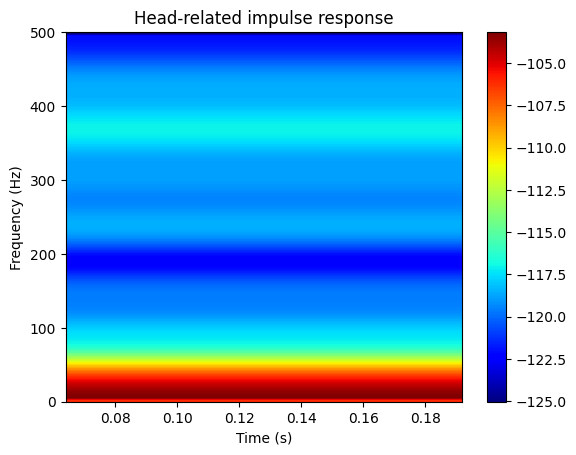

In [42]:
data = subject_003.hrir_r

# Plot the data as a spectrogram
plt.specgram(data, Fs=1000, cmap='jet')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Head-related impulse response')
plt.colorbar()
plt.show()

In [43]:
'''
                                            (-45 to 45 in steps of 5)
Azimuths are uniformly sampled as [-80 -65 -55 -45:5:45 55 65 80]
Elevations are uniformly sampled in 5.625 deg, from -45 deg to 230.625 deg
'''

'''
Arrays ITD, hrir_r, hrir_l, OnR & OnL has 25 lists (25 different azimuths) (left to right).
Each list has 50 readings (50 different elevations) (top to bottom) at approx 5 deg angular increment
'''

'''
len(sub.hrir) = 25
len(sub.hrir[0]) = 50
len(sub.hrir[0][0]) = 200

total readings per HRIR = 25 * 50 * 200 = 2,50,000
'''

class Subject:

    def __init__(self, id, onR, onL, itd, hrir_r, hrir_l):
        self.id = id
        self.onR = onR
        self.onL = onL
        self.itd = itd
        self.hrir_r = hrir_r
        self.hrir_l = hrir_l

In [44]:
kemar_frontal_large = read_kemar_mat("frontal", "large")
kemar_frontal_small = read_kemar_mat("frontal", "small")
kemar_horizontal_large = read_kemar_mat("horizontal", "large")
kemar_horizontal_small = read_kemar_mat("horizontal", "small")